In [173]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
from scipy.integrate import odeint, solve_bvp

import matplotlib
from cmath import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Model vožnje skozi semafor: variacijska metoda

Pogoja $\int_0^{t_0}v(t)dt \leq l$ in $\int_0^{t_0}\dot{v}(t)dt = min$ $\rightarrow$ Lagrange: $L = \dot{v} - \lambda v$

3.000000000000017


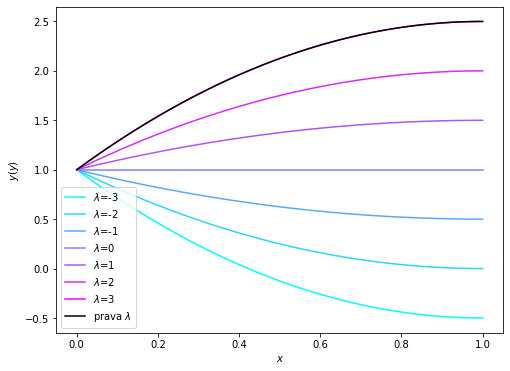

In [174]:
v_0 = 1    # m/s
t_0 = 1    # sekunde
l = 2    # metri

z = l / (v_0 * t_0)

def y_max_koncna_hitrost(t, lamb):

    def func(t, y):
        return np.vstack((y[1], -lamb * np.ones(len(t))))

    def bc(ya, yb):
        return np.array([ya[0] - 1, yb[1]])

    y = np.zeros((2, len(t)))
    y[0, 0] = 1

    return solve_bvp(func, bc, t, y)



def y_max_koncna_hitrost_lamb(t, z):

    def func(t, y, p):
        lamb = p[0]
        return np.vstack((y[1] / z, y[2], -lamb * np.ones(len(t))))

    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] -1, yb[2]])

    y = np.zeros((3, len(t)))
    y[1, 0] = 1
    y[0, 0] = -1

    return solve_bvp(func, bc, t, y, p=[3*(z-1)])


tspace = np.linspace(0, 1, 100)
lambspace = np.arange(-3, 4, 1)

cmap = plt.get_cmap('cool', len(lambspace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
i = 0

for lamb in lambspace:
    sol = y_max_koncna_hitrost(tspace, lamb)
    axes.plot(tspace, sol.sol(tspace)[0], label=f'$\lambda$={lamb}', color=cmap(i), marker='')
    i += 1

sol_lam = y_max_koncna_hitrost_lamb(tspace, z)
print(sol_lam.sol(tspace)[2][0])
axes.plot(tspace, sol_lam.sol(tspace)[1], color='black', label='prava $\lambda$') 

axes.set_xlabel('$x$')
axes.set_ylabel('$y(y)$')

plt.legend()
plt.savefig('grafi/prva_naloga.pdf')
plt.show()

-2.7000000000000033
-2.1299999999774175
-1.559999999999995
-0.9900000000084438
-0.4199999999840163
0.149999999996228
0.719999999989884
1.2900000000053369
1.8600000000061334
2.4300000000303044
3.000000000000017


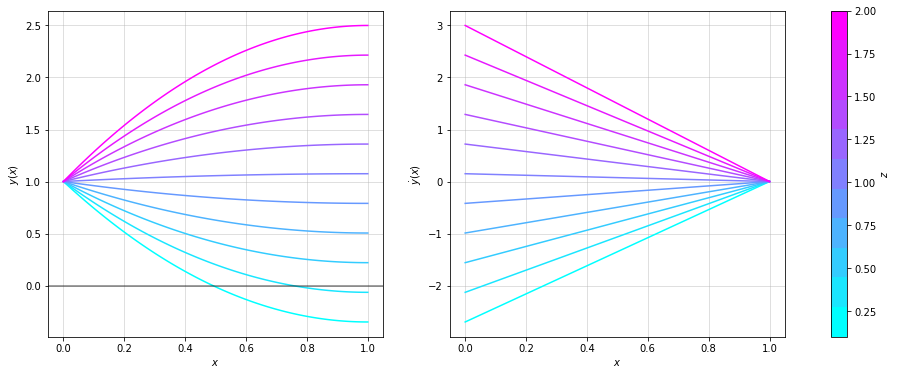

In [175]:
zspace = np.linspace(0.1, 2, 11)
cmap = plt.get_cmap('cool', len(zspace))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.5, 6), sharex=True)


for i in range(len(zspace)):
    #v = vspace[i]
    zacetna = zspace[i] #l / (v * t_0)
    sol_lam = y_max_koncna_hitrost_lamb(tspace, zacetna)
    print(sol_lam.sol(tspace)[2][0])
    axes[0].plot(tspace, sol_lam.sol(tspace)[1], color=cmap(i), label=f'$z=${round(zacetna, 2)}') 

    axes[1].plot(tspace, sol_lam.sol(tspace)[2], color=cmap(i), label=f'$z=${round(zacetna, 2)}')

axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y(x)$')
axes[0].axhline(y=0, color='black', alpha=0.5)
axes[0].grid(alpha=0.5)

axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$\dot{y}(x)$')
axes[1].grid(alpha=0.5)

norm = matplotlib.colors.Normalize(vmin=zspace[0], vmax=zspace[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label='$z$')

#plt.legend()
plt.savefig('grafi/hitrosti_basic.pdf')
plt.show()

funkcija je padajoca --> torej da zracunamo pr kerih zijh je stala t=1. poj dobimo $z \geq 1 - \frac{1}{3(t-t^2/2)}$. Dobimo $z\geq1/3$

### Upgrade: omejitev

4.000000000000018
[6.]


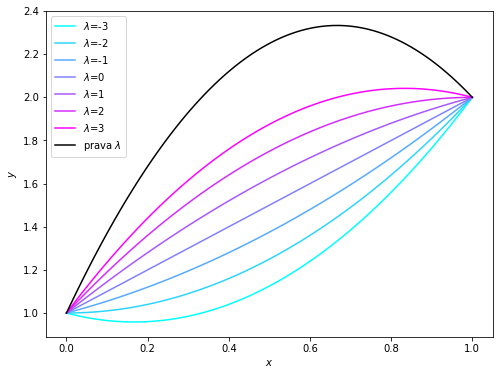

In [176]:
v_omejitev = 2
v_om = v_omejitev / v_0

def radar(t, lam, v_om):

    def func(t, y):
        return np.vstack((y[1], -lam * np.ones(len(t))))

    def bc(ya, yb):
        return np.array([ya[0] - 1, yb[0] - v_om])

    y = np.zeros((2, len(t)))
    y[0, 0] = 1
    y[0, -1] = v_om

    return solve_bvp(func, bc, t, y)


def radar_lam(t, z, v_om):

    def func(t, y, p):
        lamb = p[0]
        return np.vstack((y[1] / z, y[2], -lamb * np.ones(len(t))))

    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - 1, yb[1] - v_om])

    y = np.zeros((3, len(t)))
    y[1, 0] = 1
    y[0, 0] = -1
    y[1, -1] = v_om

    return solve_bvp(func, bc, t, y, p=[6*(2*z - v_om - 1)])


tspace = np.linspace(0, 1, 100)
lambspace = np.arange(-3, 4, 1)

cmap = plt.get_cmap('cool', len(lambspace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
i = 0

for lamb in lambspace:
    sol = radar(tspace, lamb, v_om)
    axes.plot(tspace, sol.sol(tspace)[0], label=f'$\lambda$={lamb}', color=cmap(i), marker='')
    i += 1

sol_lam = radar_lam(tspace, z, v_om)
print(sol_lam.sol(tspace)[2][0])
print(sol_lam.p)
axes.plot(tspace, sol_lam.sol(tspace)[1], color='black', label='prava $\lambda$') 

axes.set_xlabel('$x$')
axes.set_ylabel('$y$')

plt.legend()
plt.savefig('grafi/omejitev.pdf')
plt.show()

-7.399999999999967
-6.259999999812493
-5.119999999907119
-3.9799999999842424
-2.8399999998219316
-1.6999999999704456
-0.5600000001209828
0.5800000000315298
1.7199999999551236
2.8600000002709804
4.000000000000018


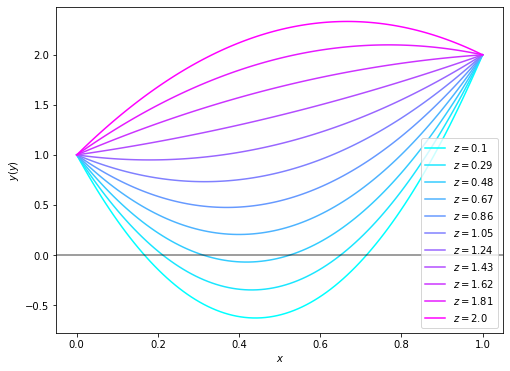

In [177]:
zspace = np.linspace(0.1, 2, 11)
cmap = plt.get_cmap('cool', len(zspace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)


for i in range(len(zspace)):
    zacetna = zspace[i]
    sol_lam = radar_lam(tspace, zacetna, v_om)
    print(sol_lam.sol(tspace)[2][0])
    axes.plot(tspace, sol_lam.sol(tspace)[1], color=cmap(i), label=f'$z=${round(zacetna, 2)}') 

axes.set_xlabel('$x$')
axes.set_ylabel('$y(y)$')
axes.axhline(y=0, color='black', alpha=0.5)

plt.legend()
plt.savefig('grafi/hitrosti_radar.pdf')
plt.show()

### Funkcional - visje potence

c:\Users\lotri\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_bvp.py:1092: RuntimeWarning: invalid value encountered in divide
  r_middle = 1.5 * col_res / h
c:\Users\lotri\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_bvp.py:591: RuntimeWarning: invalid value encountered in divide
  slope = (y[:, 1:] - y[:, :-1]) / h


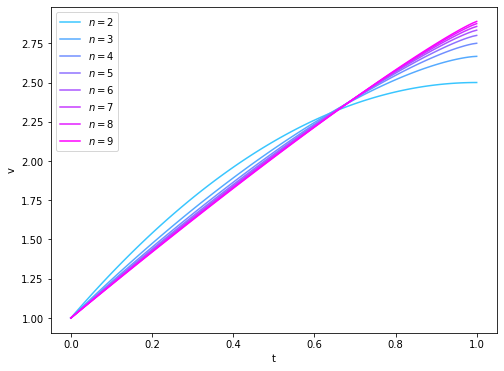

In [178]:
def v_even_functional_LAM(t, n, C):

    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, y[2], -LAM * t_0 ** (2*n) *v_0 ** (1-2*n)* y[2] ** (2- 2 * n) / (2 *n * (2 * n -1))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - 1, yb[2]])
    y = np.zeros((3, len(t)))
    y[1] = 1+np.ones(len(t)) * t**(2*n/(2*n-1))
    y[1, 0] = 1
    y[0, 0] = -1
    y[0, -1] = 0
    y[2, -1]=0

    return solve_bvp(fun, bc, t, y, p =[C*(n*2-1)])

def v_exp_functional_LAM(t, n, C):

    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, (LAM * (1 - t)) ** (1/(n-1) * np.ones(len(t)))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - 1])
    y = np.zeros((2, len(t)))
    # y[1] = 1+np.ones(len(t)) * t**(n)
    y[1, 0] = 1
    y[0, 0] = -1
    y[0, -1] = 0

    return solve_bvp(fun, bc, t, y, p =[1])

time = np.linspace(0, 1, 100)
C = l / (v_0*t_0)

cmap = plt.get_cmap('cool', 10)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

for n in range(2,10):
    sol_l = v_exp_functional_LAM(time, n, C)
    axes.plot(time, sol_l.sol(time)[1], label=f'$n=${n}', color=cmap(n))


plt.legend()
plt.xlabel('t')
plt.ylabel('v')
#print(sol_l.p, sol_l.sol(time)[1])
plt.savefig('grafi/potencefunkcional.pdf')
plt.show()

### Zaporedni semaforji

1
2
3
4
5
6
7
8
9
10


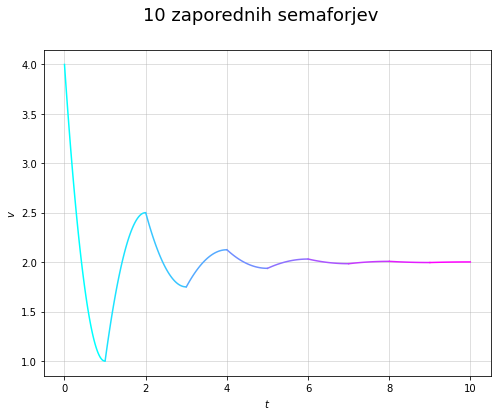

In [179]:
def zaporedni_semaforji(T, C, v0):

    def en_semafor(t, C, v0, a0):

        def fun(t, y, p):
            LAM = p[0]
            return np.vstack((y[1] / C, y[2], -LAM * np.ones(len(t))))
        
        def bc(ya, yb, p):
            return np.array([ya[0] + 1, yb[0], ya[1] - v0, yb[2]])
        
        y = np.zeros((3, len(t)))
        y[1, 0] = v0
        y[0, 0] = -1

        sol = solve_bvp(fun, bc, t, y, p = [1])
        return sol.sol(t), (sol.sol(t)[1])[-1], (sol.sol(t)[2])[-1]
    
    tmin = 0
    a0 = -3
    sols = np.zeros((3, T * 100))
    for t in range(1, T + 1):
        print(t)
        time = np.linspace(tmin, t, 100)
        sol, v0, a0 = en_semafor(time, C, v0, a0)
        sols[:, tmin*100:t*100] = sol
        tmin = t
    
    return sols

C = 2
T = 10

cmap = plt.get_cmap('cool', T)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

sols = zaporedni_semaforji(T, C, 4)
time = np.linspace(0, T, 100 * T)

for i in range(T):
    axes.plot(time[100*i:100*(i+1)], sols[1][100*i:100*(i+1)], color=cmap(i))


fig.suptitle(f'{T} zaporednih semaforjev', fontsize=18)
axes.grid(alpha=0.5)
axes.set_xlabel('$t$')
axes.set_ylabel('$v$')

plt.savefig(f'grafi/zaporedni_{T}.pdf')
plt.show()

## Drug sistem

In [180]:
zacetnaHitrost = 1.5
razdalja = 1
casSemaforja = 1

def funMaksHitrost(t, v0):
    l = razdalja
    t0 = casSemaforja
    #v0 = zacetnaHitrost
    return 3*(l - v0*t0)/(2*t0**3)*(t**2 - 2*t0*t) + v0 

def funMaksHitrostBrezDim(tau, omega0 = 1):
    vc = razdalja/casSemaforja
    #omega0 = zacetnaHitrost/vc
    return 3/2*(omega0-1)*(tau**2 - 2*tau) + omega0

def dolocenaKoncnaInZacetnaHitrost(t, v0, v1):
    return 3*(v0 + v1 - 2)*t**2 - 2*(2*v0+v1-3)*t + v0

def polozajKoncnaInZacetnaHitrost(t, v0, v1):
    return (v0 + v1 - 2)*t**3 - (2*v0+v1-3)*t**2 + v0*t

def polozajfunMaksHitrostBrezDim(tau, omega0 = 1):
    vc = razdalja/casSemaforja
    #omega0 = zacetnaHitrost/vc
    return 0.5*(omega0-1)*(tau**3 - 3*tau) + omega0*tau

def pospesekfunMaksHitrostBrezDim(tau, omega0=1):
    return 3/2*(omega0-1)*(tau*2 - 2)

def pospesekKoncnaInZacetnaHitrost(t, v0, v1):
    return 3*(v0 + v1 - 2)*t*2 - 2*(2*v0+v1-3)

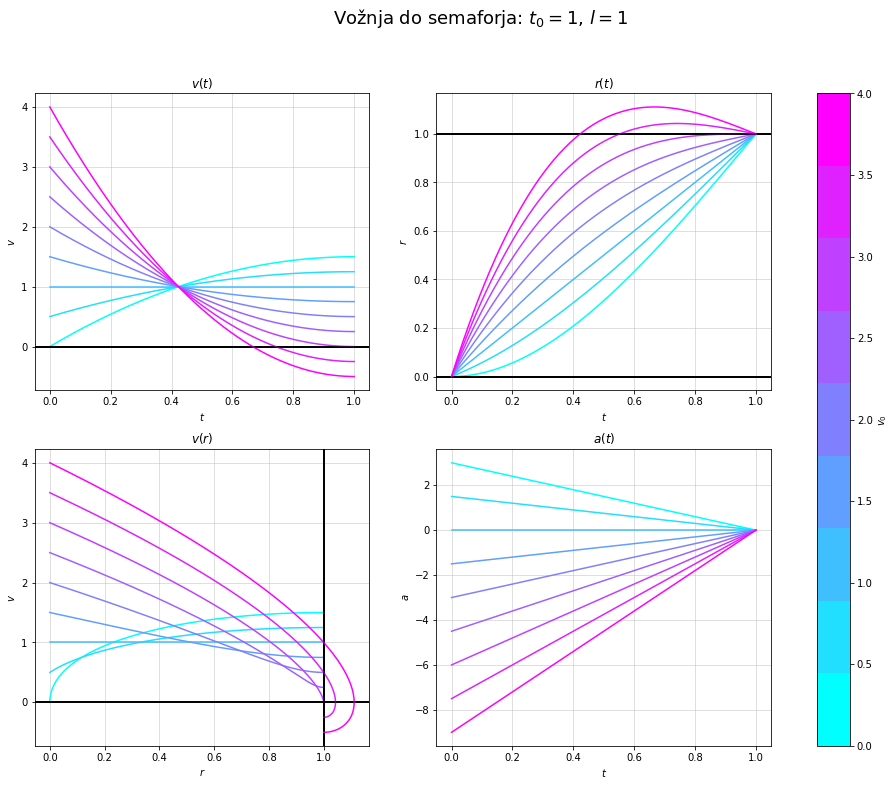

In [181]:
v_space = np.linspace(0, 4, 9)
t_0 = 1
l = 1

t_space = np.linspace(0, t_0, 500)

cmap=plt.get_cmap('cool', len(v_space))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16.5, 12), sharex=False)

for i in range(len(v_space)):
    v_0 = v_space[i]
    hitrost = funMaksHitrostBrezDim(t_space, v_0)
    polozaj = polozajfunMaksHitrostBrezDim(t_space, v_0)
    pospesek = pospesekfunMaksHitrostBrezDim(t_space, v_0)
    
    
    axes[0, 0].plot(t_space, hitrost, color=cmap(i))
    axes[0, 0].grid(alpha=0.5)
    axes[0, 0].axhline(y=0, alpha=0.5, color='black')
    axes[0, 0].set_xlabel('$t$')
    axes[0, 0].set_ylabel('$v$')
    axes[0, 0].title.set_text('$v(t)$')

    axes[0, 1].plot(t_space, 1-polozaj[::-1], color=cmap(i))
    axes[0, 1].grid(alpha=0.5)
    axes[0, 1].axhline(y=0, alpha=0.5, color='black')
    axes[0, 1].axhline(y=1, alpha=0.5, color='black')
    axes[0, 1].set_xlabel('$t$')
    axes[0, 1].set_ylabel('$r$')
    axes[0, 1].title.set_text('$r(t)$')

    axes[1, 0].plot(1-polozaj[::-1], hitrost, color=cmap(i))
    axes[1, 0].grid(alpha=0.5)
    axes[1, 0].axhline(y=0, alpha=0.5, color='black')
    axes[1, 0].axvline(x=1, alpha=0.5, color='black')
    axes[1, 0].set_xlabel('$r$')
    axes[1, 0].set_ylabel('$v$')
    axes[1, 0].title.set_text('$v(r)$')

    axes[1, 1].plot(t_space, pospesek, color=cmap(i))
    axes[1, 1].grid(alpha=0.5)
    axes[1, 1].set_xlabel('$t$')
    axes[1, 1].set_ylabel('$a$')
    axes[1, 1].title.set_text('$a(t)$')

norm = matplotlib.colors.Normalize(vmin=v_space[0], vmax=v_space[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label='$v_0$')

    
fig.suptitle(f'Vožnja do semaforja: $t_0=${t_0}, $l=${l}', fontsize=18)
plt.savefig('grafi/dimenzijsko.pdf')

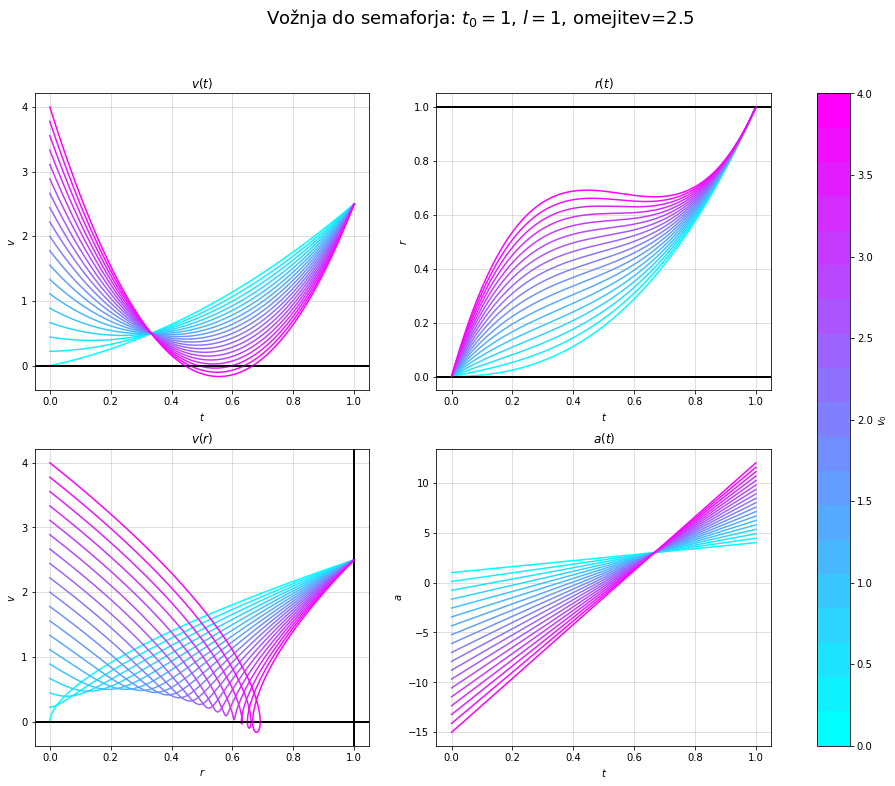

In [182]:
v_space = np.linspace(0, 4, 19)
t_0 = 1
l = 1
v_omejitev = 2.5

t_space = np.linspace(0, t_0, 500)

cmap=plt.get_cmap('cool', len(v_space))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16.5, 12), sharex=False)

for i in range(len(v_space)):
    v_0 = v_space[i]
    hitrost = dolocenaKoncnaInZacetnaHitrost(t_space, v_0, v_omejitev)
    polozaj = polozajKoncnaInZacetnaHitrost(t_space, v_0, v_omejitev)
    pospesek = pospesekKoncnaInZacetnaHitrost(t_space, v_0, v_omejitev)
    
    
    axes[0, 0].plot(t_space, hitrost, color=cmap(i))
    axes[0, 0].grid(alpha=0.5)
    axes[0, 0].axhline(y=0, alpha=0.5, color='black')
    axes[0, 0].set_xlabel('$t$')
    axes[0, 0].set_ylabel('$v$')
    axes[0, 0].title.set_text('$v(t)$')

    axes[0, 1].plot(t_space, polozaj, color=cmap(i))
    axes[0, 1].grid(alpha=0.5)
    axes[0, 1].axhline(y=0, alpha=0.5, color='black')
    axes[0, 1].axhline(y=1, alpha=0.5, color='black')
    axes[0, 1].set_xlabel('$t$')
    axes[0, 1].set_ylabel('$r$')
    axes[0, 1].title.set_text('$r(t)$')

    axes[1, 0].plot(polozaj, hitrost, color=cmap(i))
    axes[1, 0].grid(alpha=0.5)
    axes[1, 0].axhline(y=0, alpha=0.5, color='black')
    axes[1, 0].axvline(x=1, alpha=0.5, color='black')
    axes[1, 0].set_xlabel('$r$')
    axes[1, 0].set_ylabel('$v$')
    axes[1, 0].title.set_text('$v(r)$')

    axes[1, 1].plot(t_space, pospesek, color=cmap(i))
    axes[1, 1].grid(alpha=0.5)
    axes[1, 1].set_xlabel('$t$')
    axes[1, 1].set_ylabel('$a$')
    axes[1, 1].title.set_text('$a(t)$')


norm = matplotlib.colors.Normalize(vmin=v_space[0], vmax=v_space[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label='$v_0$')

    
fig.suptitle(f'Vožnja do semaforja: $t_0=${t_0}, $l=${l}, omejitev={v_omejitev}', fontsize=18)
plt.savefig(f'grafi/dim_radar_{t_0}_{l}_{v_omejitev}.pdf')

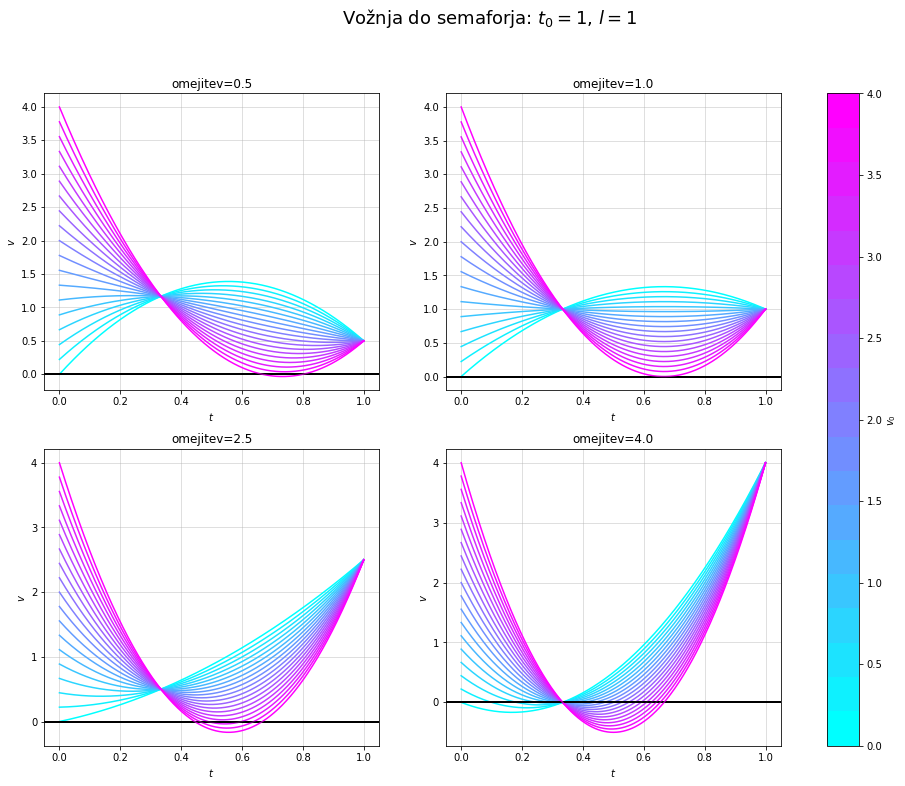

In [183]:
v_space = np.linspace(0, 4, 19)
t_0 = 1
l = 1

omejitve = np.array([0.5, 1, 2.5, 4])

t_space = np.linspace(0, t_0, 500)

cmap=plt.get_cmap('cool', len(v_space))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16.5, 12), sharex=False)

for i in range(len(v_space)):
    v_0 = v_space[i]
        
    hitrost = dolocenaKoncnaInZacetnaHitrost(t_space, v_0, omejitve[0])
    axes[0, 0].plot(t_space, hitrost, color=cmap(i))
    axes[0, 0].grid(alpha=0.5)
    axes[0, 0].axhline(y=0, alpha=0.5, color='black')
    axes[0, 0].set_xlabel('$t$')
    axes[0, 0].set_ylabel('$v$')
    axes[0, 0].title.set_text(f'omejitev={omejitve[0]}')

    hitrost = dolocenaKoncnaInZacetnaHitrost(t_space, v_0, omejitve[1])
    axes[0, 1].plot(t_space, hitrost, color=cmap(i))
    axes[0, 1].grid(alpha=0.5)
    axes[0, 1].axhline(y=0, alpha=0.5, color='black')
    axes[0, 1].set_xlabel('$t$')
    axes[0, 1].set_ylabel('$v$')
    axes[0, 1].title.set_text(f'omejitev={omejitve[1]}')

    hitrost = dolocenaKoncnaInZacetnaHitrost(t_space, v_0, omejitve[2])
    axes[1, 0].plot(t_space, hitrost, color=cmap(i))
    axes[1, 0].grid(alpha=0.5)
    axes[1, 0].axhline(y=0, alpha=0.5, color='black')
    axes[1, 0].set_xlabel('$t$')
    axes[1, 0].set_ylabel('$v$')
    axes[1, 0].title.set_text(f'omejitev={omejitve[2]}')

    hitrost = dolocenaKoncnaInZacetnaHitrost(t_space, v_0, omejitve[3])
    axes[1, 1].plot(t_space, hitrost, color=cmap(i))
    axes[1, 1].grid(alpha=0.5)
    axes[1, 1].axhline(y=0, alpha=0.5, color='black')
    axes[1, 1].set_xlabel('$t$')
    axes[1, 1].set_ylabel('$v$')
    axes[1, 1].title.set_text(f'omejitev={omejitve[3]}')


norm = matplotlib.colors.Normalize(vmin=v_space[0], vmax=v_space[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label='$v_0$')


    
fig.suptitle(f'Vožnja do semaforja: $t_0=${t_0}, $l=${l}', fontsize=18)
plt.savefig(f'grafi/dim_radar_{t_0}_{l}_omejitve.pdf')

## še zadnje naloge

In [184]:
#params:

t0 = 1
v0 = 1
l = 2
C = l / (v0 * t0)

def velocity_max_end_speed(t, LAM, v0):

    def fun(t, y):
        return np.vstack((y[1], -LAM * np.ones(len(t))))
    
    def bc(ya, yb):
        return np.array([ya[0] - v0, yb[1]])
    
    y = np.zeros((2, len(t)))
    y[0, 0] = v0

    return solve_bvp(fun, bc, t, y)

def v_max_end_speed_LAM(t, C, v0):
    
    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, y[2], -LAM * np.ones(len(t))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - v0, yb[2]])
    
    y = np.zeros((3, len(t)))
    y[1, 0] = v0
    y[0, 0] = -1

    return solve_bvp(fun, bc, t, y, p = [3 * (C - 1)])

def v_radar(t, LAM, C2, v0):

    def fun(t, y):
        return np.vstack((y[1], -LAM * np.ones(len(t))))
    
    def bc(ya, yb):
        return np.array([ya[0] - v0, yb[0] - C2])
    
    y = np.zeros((2, len(t)))
    y[0, 0] = v0
    y[0, -1] = C2

    return solve_bvp(fun, bc, t, y)

def v_radar_LAM(t, C, C2, v0):
    
    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, y[2], -LAM * np.ones(len(t))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - v0, yb[1] - C2])
    
    y = np.zeros((3, len(t)))
    y[1, 0] = v0
    y[0, 0] = -1
    y[1, -1] = C2

    return solve_bvp(fun, bc, t, y, p = [12 * C - 6 * C2 - 6])

def v_even_functional_LAM(t, n, C, v0):

    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, y[2], -LAM * t0 ** (2*n) *v0 ** (1-2*n)* y[2] ** (2- 2 * n) / (2 *n * (2 * n -1))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - v0, yb[2]])
    y = np.zeros((3, len(t)))
    y[1] = 1+np.ones(len(t)) * t**(2*n/(2*n-1))
    y[1, 0] = v0
    y[0, 0] = -1
    y[0, -1] = 0
    y[2, -1]=0

    return solve_bvp(fun, bc, t, y, p =[C*(n*2-1)])

def v_exp_functional_LAM(t, n, C, v0):

    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, (LAM * (1 - t)) ** (1/(n-1)) * np.ones(len(t))))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - v0])
    y = np.zeros((2, len(t)))
    # y[1] = 1+np.ones(len(t)) * t**(n)
    y[1, 0] = v0
    y[0, 0] = -1
    y[0, -1] = 0

    return solve_bvp(fun, bc, t, y, p =[1])

def high_func_v(t, C, n):
    A = (C-1) * (2 * n -1) / n
    return A * ((1-t)**(1/(n-1)) *(t-1) + 1) + 1

def high_func_a(t, C, n):
    return (C-1) * (2*n-1)/(n-1) * (1-t) ** (1/(n-1))

def high_func_x(t, C, n):
    l = (C-1)*(2*n-1)/n
    kons = -1 -l*(n-1)/(2*n-1) / C
    return ((1+l)*t+l*(n-1)*(1-t)**((2*n-1)/(n-1)) / (2*n-1))/C+kons

def v_v_functional_LAM(t, C,v0, OMEGA=100):

    def fun(t, y, p):
        LAM = p[0]
        return np.vstack((y[1] / C, y[2], - LAM + OMEGA * y[1]))
    
    def bc(ya, yb, p):
        return np.array([ya[0] + 1, yb[0], ya[1] - v0, yb[2]])
    
    y = np.zeros((3, len(t)))
    y[1, 0] = v0
    y[0, 0] = -1
    y[0, -1] = 0

    return solve_bvp(fun, bc, t, y, p =[1])

# x = np.arange(0.5,2.5, 0.5)
# for OMEGA in x:
#     sol_l = v_v_functional_LAM(time, C, OMEGA)
#     plt.plot(time, sol_l.sol(time)[1], ".", label=str(OMEGA))
# plt.legend()
# print(sol_l.p, sol_l.sol(time)[1])
# plt.show()

def zaporedni_semaforji(T, C, v0, a0):

    def en_semafor(t, C, v0, a0):

        def fun(t, y, p):
            LAM = p[0]
            return np.vstack((y[1] / C, y[2], -LAM * np.ones(len(t))))
        
        def bc(ya, yb, p):
            return np.array([ya[0] + 1, yb[0], ya[1] - v0, ya[2]-a0])
        
        y = np.zeros((3, len(t)))
        y[1, 0] = v0
        y[2, 0] = a0
        y[0, 0] = -1

        sol = solve_bvp(fun, bc, t, y, p = [1])
        return sol.sol(t), (sol.sol(t)[1])[-1], (sol.sol(t)[2])[-1]
    
    tmin = 0
    sols = np.zeros((3, T * 100))
    for t in range(1, T + 1):
        time = np.linspace(tmin, t, 100)
        sol, v0, a0 = en_semafor(time, C, v0, a0)
        sols[:, tmin*100:t*100] = sol
        tmin = t
    j = 1
    for i in range(T):
        sols[0, i*100:j*100] = sols[0, i*100:j*100] + i
        j+=1
    return sols

N = 100
time = np.linspace(0, 1, N)

lambdas = np.linspace(-3, 3, 20)

#### Ploti

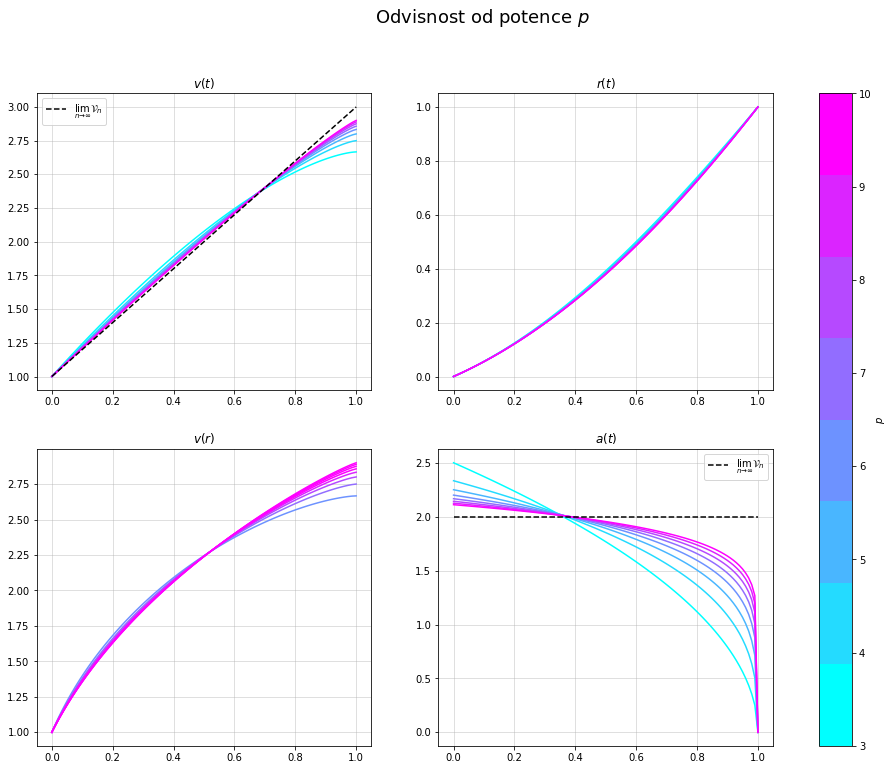

In [185]:
n = np.arange(3, 11, 1)
cmap = plt.get_cmap("cool", len(n))
c = np.arange(1., len(n) + 1)
norm = matplotlib.colors.BoundaryNorm(np.arange(len(c)+1)+0.5,len(c))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.5,12))
ax1 = ax[0, 1]
ax2 = ax[0, 0]
ax3 = ax[1, 1]
ax4 = ax[1, 0]
#ax4 = fig.add_axes([0.85, 0.15, 0.05, 0.7])

for i in n:
    # sol = v_exp_functional_LAM(time, i, C, 1)
    # p=sol.p
    # a=(p * (1 - time)) ** (1/(i-1))
    # sol = sol.sol(time)
    # ax1.plot(time, sol[0])
    # ax3.plot(time, a)
    # ax2.plot(time, sol[1])
    v = high_func_v(time, C, i)
    a = high_func_a(time, C, i)
    x = 1+high_func_x(time, C, i)
    ax1.plot(time, x, color = cmap(i-3))
    ax2.plot(time, v, color = cmap(i-3))
    ax3.plot(time, a, color = cmap(i-3))
    ax4.plot(x, v, color=cmap(i))
ax2.plot(time, 1+2*(C-1)*time, linestyle="dashed", color="black", label=r"$\lim_{n\to\infty}\mathcal{V}_n$")
ax3.plot(time, 2*(C-1)*np.ones_like(time), linestyle="dashed", color="black", label=r"$\lim_{n\to\infty}\mathcal{V}_n$")
# ax1.set_yscale("exp")
ax1.set_title(r"$r(t)$")
ax2.set_title(r"$v(t)$")
ax3.set_title(r"$a(t)$")
ax4.set_title('$v(r)$')
#fig.subplots_adjust( right=0.83)
#cbar = fig.colorbar(sm,cax=ax4,ticks = c)
#cbar.ax.set_yticklabels(n)

norm = matplotlib.colors.Normalize(vmin=n[0], vmax=n[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='$p$')

ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax4.grid(alpha=0.5)

ax2.legend()
ax3.legend()
fig.suptitle("Odvisnost od potence $p$", fontsize=18)
plt.savefig('grafi/odvisnost_p_ult.pdf')
plt.show()

### Hitrostni potencial

[13.88276239]


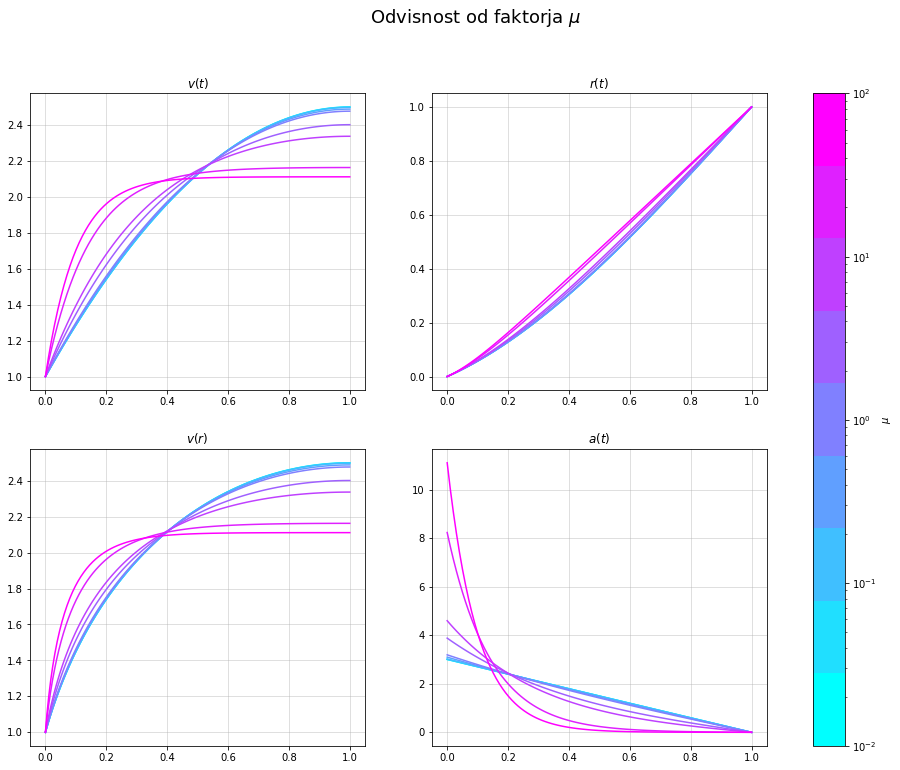

In [186]:
x = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100])
cmap = plt.get_cmap("cool", len(x))
c = np.arange(1., len(x) + 1)
norm = matplotlib.colors.BoundaryNorm(np.arange(len(c)+1)+0.5,len(c))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.5,12))
ax1 = ax[0, 1]
ax2 = ax[0, 0]
ax3 = ax[1, 1]
ax4 = ax[1, 0]

for i, OMEGA in enumerate(x):
    sol = v_v_functional_LAM(time, C, 1, OMEGA).sol(time)
    ax1.plot(time, 1+sol[0], color = cmap(i))
    ax3.plot(time, sol[2], color = cmap(i))
    ax2.plot(time, sol[1], color = cmap(i))
    ax4.plot(1+sol[0], sol[1], color=cmap(i))

print(v_v_functional_LAM(time, C, 1, 5).p)
ax1.set_title(r"$r(t)$")
ax2.set_title(r"$v(t)$")
ax3.set_title(r"$a(t)$")
ax4.set_title('$v(r)$')

norm = matplotlib.colors.LogNorm(vmin=x[0], vmax=x[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='$\mu$')

ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax4.grid(alpha=0.5)

fig.suptitle('Odvisnost od faktorja $\mu$', fontsize=18)
plt.savefig('grafi/hitrostni_potencial.pdf')
plt.show()

### Zaporedni semaforji

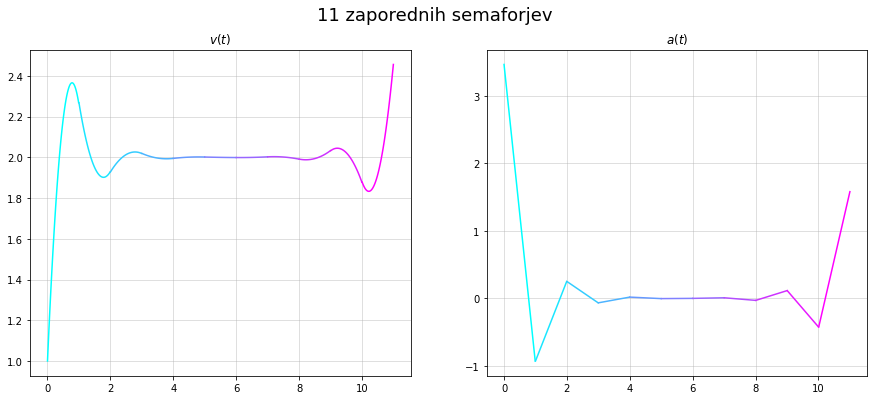

In [187]:
T=11

cmap = plt.get_cmap("cool", T)
sols = zaporedni_semaforji(T, C, 1, 3.4641)

time = np.linspace(0, T, 100 * T)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for i in range(T):
    ax[0].plot(time[100*i:100*(i+1)], sols[1][100*i:100*(i+1)], color=cmap(i))
    ax[1].plot(time[100*i:100*(i+1)], sols[2][100*i:100*(i+1)], color=cmap(i))


ax[0].set_title(r"$v(t)$")
ax[1].set_title(r"$a(t)$")
fig.suptitle(f'{T} zaporednih semaforjev', fontsize=18)

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)

plt.savefig(f'grafi/zaporedni_fin_{T}.pdf')
plt.show()